In [1]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

import math

from scipy.special import expit

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

# http://scikit-learn.org/stable/tutorial/machine_learning_map/

In [2]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [3]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(raw_train)
dummy_test = make_dummy_vector(raw_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)

In [4]:
# Data for a single sample
print raw_train[0]

[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
  220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
  113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
    0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
    0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
  244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
    0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
    0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
  255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
  255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
   37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
    0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
    0.    0.    0.    0.   90.  248.  198.   93.   

In [5]:
## This is not completely working, we need to figure out why the image seems upside down ##

# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target],(16,16), order='F')
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 1200)

In [202]:
# Calculate sigmoid function
def calc_sigmoid(target_function):
    return (1 / (1 + np.exp(-target_function)))

# Try to predict
def prediction(X,w):
    values = []
    for i in range(len(X)):      
        values.append(calc_sigmoid(np.dot(w.T,X[i])))
        
    fours = values[0:(len(X)/2)]
    nines = values[(len(X)/2):len(X)]
    ctr_four, ctr_nine = 0.0, 0.0
    
    for i in range(len(X)/2):
        if fours[i] == 0.0:
            ctr_four += 1
        if nines[i] == 1.0:
            ctr_nine += 1  
    return  ((ctr_four / (len(X)/2) * 100), (ctr_nine / (len(X)/2) * 100)) 
                

In [204]:
## Consider swapping order of bottom conditional, update to w should happend before break

def batch_learning(X, y, n, eta, epsilon = 0.001):
    accuracy = []
    length = len(X[0])
    w, old_d = np.zeros(length), np.zeros(length)
    ctr = 0
    while True:
        new_d = np.zeros(length)
        for i in range(n):
            y_hat_i = 1 / (1 + np.exp(-np.dot(w.T, X[i])))
            error = y[i] - y_hat_i
            new_d = np.add(new_d, error * X[i])
        d_norm = np.linalg.norm(old_d - new_d, 2)
        #print d_norm
        ctr = ctr + 1
        if d_norm < epsilon:
            break
        else:
            w, old_d = np.add(w, eta * new_d), new_d
            accuracy.append(prediction(X,w))
    return w, ctr, accuracy

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in exp


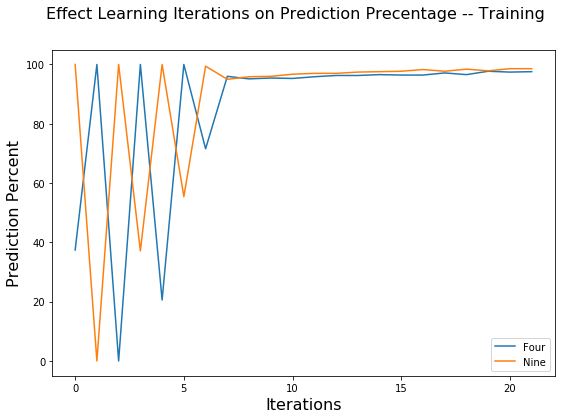

In [235]:
## Part 2
w_train = []
iter_train = []

#for i in learning_rates:
w, ctr, accuracy = batch_learning(X_train,y_train,1400,0.000111111111111)
w_train.append(w)
iter_train.append(ctr)
acc_train = accuracy

four_acc_per_epoch = []
nine_acc_per_epoch = []
for i,(a, b) in enumerate(acc_train):
    four_acc_per_epoch.append(a)
    nine_acc_per_epoch.append(b)

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(range(22),four_acc_per_epoch,label="Four")
plt.plot(range(22),nine_acc_per_epoch,label="Nine")
plt.legend()
fig.suptitle('Effect Learning Iterations on Prediction Precentage -- Training', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Prediction Percent', fontsize=16)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in exp


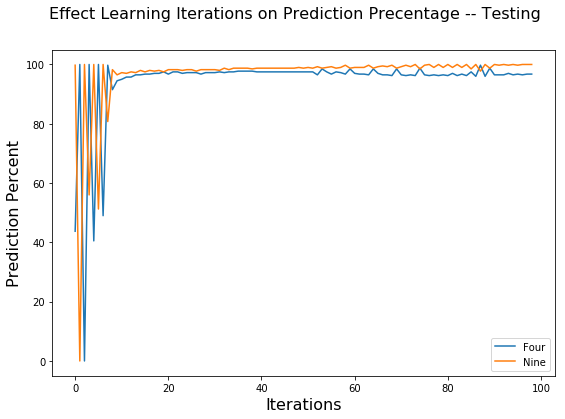

In [233]:
w_test = []
iter_test = []

w, ctr, accuracy = batch_learning(X_test,y_test,800,0.000111111111111)
w_test.append(w)
iter_test.append(ctr)
acc_test = accuracy

four_acc_per_epoch = []
nine_acc_per_epoch = []
for i,(a, b) in enumerate(acc_test):
    four_acc_per_epoch.append(a)
    nine_acc_per_epoch.append(b)
    
fig = plt.figure(figsize=(9,6))
plt.plot(range(99),four_acc_per_epoch,label="Four")
plt.plot(range(99),nine_acc_per_epoch,label="Nine")
plt.legend()
fig.suptitle('Effect Learning Iterations on Prediction Precentage -- Testing', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Prediction Percent', fontsize=16)
